In [1]:
import pathlib as pl

import hcp_utils as hcp
import nibabel as nib
import nilearn.surface
import numpy as np

from common.download_file import download_file

DATA_ROOT = pl.Path('../data')
DIR_TEMP = pl.Path('../temp')
DIR_TEMP.mkdir(parents=True, exist_ok=True)

FILE_SURF_DT = DATA_ROOT / 'C-PAC_Derivatives/abcd-options/sub-NDARAD481FXF_ses-1/Derivatives/func/sub-NDARAD481FXF_1_task-task-rest_space-fsLR_den-32k_bold-dtseries.nii'

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
surf_dt_nii = nib.load(FILE_SURF_DT)
surf_dt = surf_dt_nii.get_fdata()

display(surf_dt.shape)

# Calculate time series mean
surf_mean = np.mean(surf_dt, 0)

surf_mean.shape

(420, 91282)

(91282,)

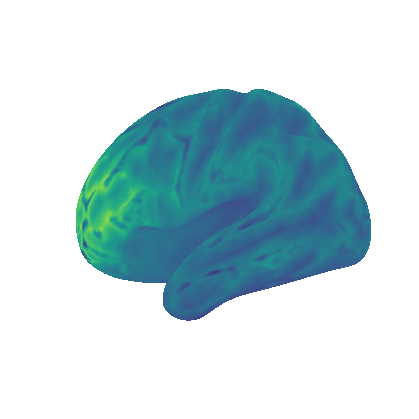

In [3]:
# View surface plot
_ = nilearn.plotting.plot_surf(hcp.mesh.inflated, hcp.cortex_data(surf_mean),
                           bg_map=hcp.mesh.sulc, threshold=1e-14)

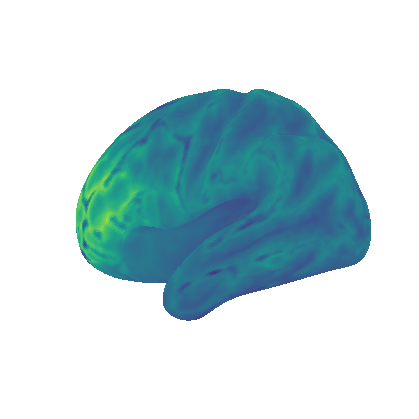

In [4]:
# A single picture from the time series for comparison
_ = nilearn.plotting.plot_surf(hcp.mesh.inflated, hcp.cortex_data(surf_dt[200]),
                           bg_map=hcp.mesh.sulc, threshold=1e-14)

In [5]:
# Download parcellation
FILE_ATLAS_SCHAEFER200_SURF = download_file(DIR_TEMP / 'Schaefer2018_200Parcels_Kong2022_17Networks_order.dlabel.nii',
                                            'https://github.com/ThomasYeoLab/CBIG/raw/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/HCP/fslr32k/cifti/Schaefer2018_200Parcels_Kong2022_17Networks_order.dlabel.nii')

In [6]:
atlas_schaefer200_surf = nib.load(FILE_ATLAS_SCHAEFER200_SURF)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


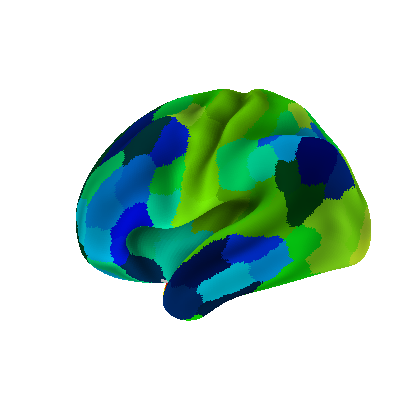

In [7]:
# Plot parcellation
_ = nilearn.plotting.plot_surf_roi(hcp.mesh.inflated, roi_map=atlas_schaefer200_surf.get_fdata().astype(int),
                                   bg_map=hcp.mesh.sulc, bg_on_data=True, darkness=.8)

In [8]:
# Extract an arbitrary parcel id (in a real setting we would either loop over all parcels or lookup a specific one by its name)
PARCEL_ID = 22

img_parcel_mask = (atlas_schaefer200_surf.get_fdata().astype(int) == PARCEL_ID)[0]
masked = np.zeros(shape=img_parcel_mask.shape)
masked[img_parcel_mask] = hcp.cortex_data(surf_mean)[img_parcel_mask]

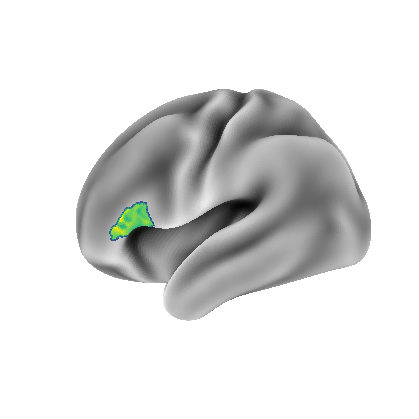

In [9]:
_ = nilearn.plotting.plot_surf(hcp.mesh.inflated, masked, bg_map=hcp.mesh.sulc, threshold=1e-14)